In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("data_for_student_case.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290382 entries, 0 to 290381
Data columns (total 17 columns):
txid                            290382 non-null int64
bookingdate                     290382 non-null object
issuercountrycode               289889 non-null object
txvariantcode                   290382 non-null object
bin                             290242 non-null float64
amount                          290382 non-null float64
currencycode                    290382 non-null object
shoppercountrycode              289900 non-null object
shopperinteraction              290382 non-null object
simple_journal                  290382 non-null object
cardverificationcodesupplied    275665 non-null object
cvcresponsecode                 290382 non-null int64
creationdate                    290382 non-null object
accountcode                     290382 non-null object
mail_id                         290382 non-null object
ip_id                           290382 non-null object
card_id  

In [4]:
date_format = '%Y-%m-%d %H:%M:%S'
df['upd_bookingdate'] = pd.to_datetime(df['bookingdate'], format = date_format)

In [5]:
monthly_grp = df['amount'].groupby(df['upd_bookingdate'].dt.month).mean()
monthly_grp

1     158086.125000
2      24950.000000
3     181272.500000
7      27424.575040
8      27136.385957
9      27872.429348
10     35431.103721
11     15734.445339
12     77764.532710
Name: amount, dtype: float64

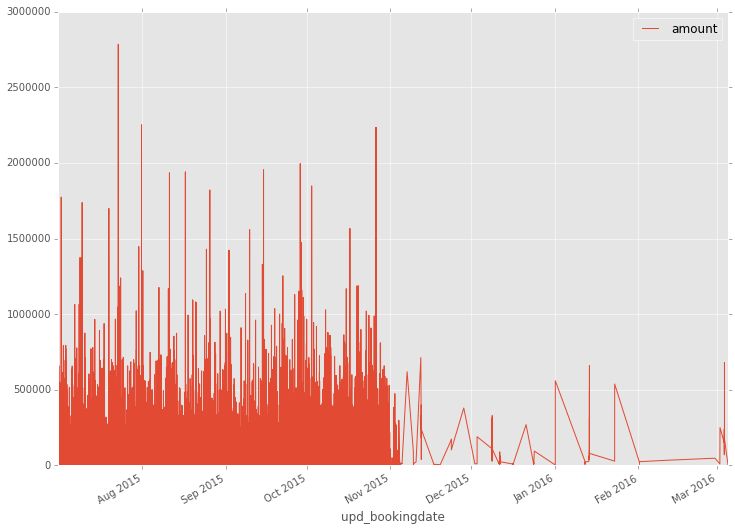

In [6]:
plt.figure();
df.plot(figsize=(12,9), x='upd_bookingdate', y='amount')

In [9]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9, 
            ...
            290372, 290373, 290374, 290375, 290376, 290377, 290378, 290379,
            290380, 290381],
           dtype='int64', length=290382)

### New try

In [3]:
fraud_d = pd.read_csv('data_for_student_case.csv', parse_dates='creationdate', index_col='creationdate')

In [4]:
fraud_d.head()

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id
creationdate,,,,,,,,,,,,,,,,
2015-07-01 23:03:11,1,2015-11-09 14:26:51,MX,mccredit,530056,64800,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email68370,ip111778,card184798
2015-07-02 04:50:55,2,2015-11-09 14:27:38,MX,mccredit,547046,44900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email101299,ip78749,card151595
2015-07-02 14:30:28,3,2015-11-23 16:34:16,MX,mccredit,528843,149900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email278604,ip70594,card242142
2015-07-03 07:53:37,4,2015-11-23 16:34:51,MX,mccredit,547146,109900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email47409,ip113648,card181744
2015-07-08 18:35:35,5,2015-11-09 14:26:08,MX,visaclassic,477291,89900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email205501,ip83553,card97271


In [5]:
fraud_d.index

DatetimeIndex(['2015-07-01 23:03:11', '2015-07-02 04:50:55',
               '2015-07-02 14:30:28', '2015-07-03 07:53:37',
               '2015-07-08 18:35:35', '2015-07-08 23:04:26',
               '2015-07-09 02:31:36', '2015-07-09 04:56:48',
               '2015-07-09 22:55:40', '2015-07-11 09:44:14', 
               ...
               '2015-10-31 22:43:46', '2015-10-31 22:44:05',
               '2015-10-31 23:01:05', '2015-10-31 23:11:00',
               '2015-10-31 23:20:35', '2015-10-31 23:21:58',
               '2015-10-31 23:31:24', '2015-10-31 23:41:40',
               '2015-10-31 23:50:07', '2015-10-31 23:55:02'],
              dtype='datetime64[ns]', name=u'creationdate', length=290382, freq=None, tz=None)

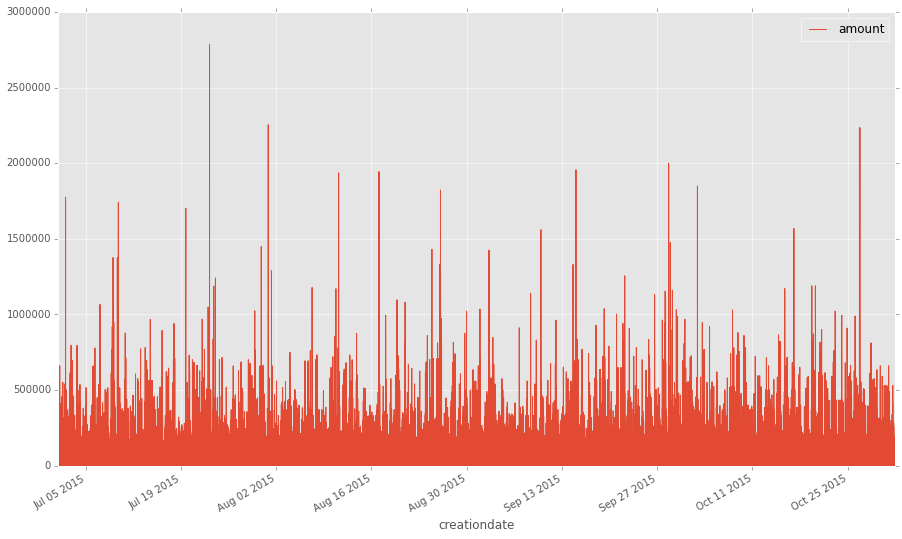

In [6]:
fraud_d.plot(figsize=(15,9), y = 'amount')

## Trying to visualize monthly trends

In [8]:
df1 = fraud_d.groupby(pd.TimeGrouper('M'))

In [9]:
df1.mean()

,txid,bin,amount,cvcresponsecode
creationdate,,,,
2015-07-31,227261.794277,485538.178901,27199.325487,0.772844
2015-08-31,265084.500828,484764.831735,26388.639065,0.773569
2015-09-30,295666.004680,485263.053789,28821.026584,0.755236
2015-10-31,332811.465965,485450.770031,35008.023498,0.773427


In [13]:
monthly_group = fraud_d['amount'].groupby(fraud_d.index.month)

In [14]:
monthly_group.mean()

7     27199.325487
8     26388.639065
9     28821.026584
10    35008.023498
Name: amount, dtype: float64

7     Axes(0.125,0.2;0.775x0.7)
8     Axes(0.125,0.2;0.775x0.7)
9     Axes(0.125,0.2;0.775x0.7)
10    Axes(0.125,0.2;0.775x0.7)
dtype: object

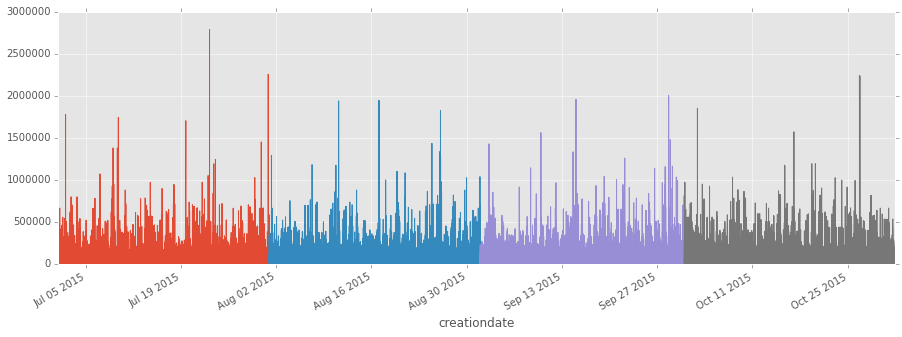

In [15]:
monthly_group.plot(figsize=(15,5))

In [16]:
fm = fraud_d.resample('M')

In [17]:
fm

,txid,bin,amount,cvcresponsecode
creationdate,,,,
2015-07-31,227261.794277,485538.178901,27199.325487,0.772844
2015-08-31,265084.500828,484764.831735,26388.639065,0.773569
2015-09-30,295666.004680,485263.053789,28821.026584,0.755236
2015-10-31,332811.465965,485450.770031,35008.023498,0.773427


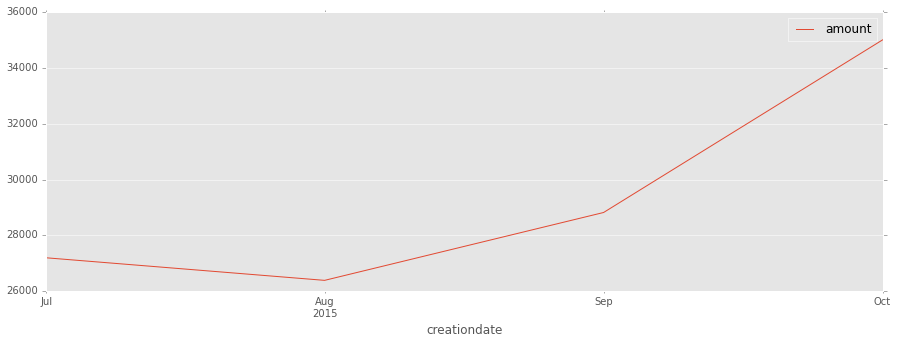

In [18]:
fm.plot(figsize=(15,5), y = 'amount')

### Checking for daily trends

In [19]:
fm = fraud_d.resample('D')

In [20]:
fm

,txid,bin,amount,cvcresponsecode
creationdate,,,,
2015-07-01,214285.641243,483935.400141,25345.299082,0.813912
2015-07-02,212002.874007,484040.967124,27891.328520,0.805415
2015-07-03,202316.110149,483584.692689,28820.941832,0.746700
2015-07-04,217802.730586,484720.188286,23340.569631,0.826030
2015-07-05,222010.311573,484653.926757,18606.566436,0.852291
2015-07-06,219422.476792,485592.450558,25512.787226,0.777943
2015-07-07,218141.853365,484063.421875,28045.231170,0.766426
2015-07-08,216523.887949,485273.417336,27907.936152,0.757294
2015-07-09,216854.697170,486061.848442,39170.376415,0.722170


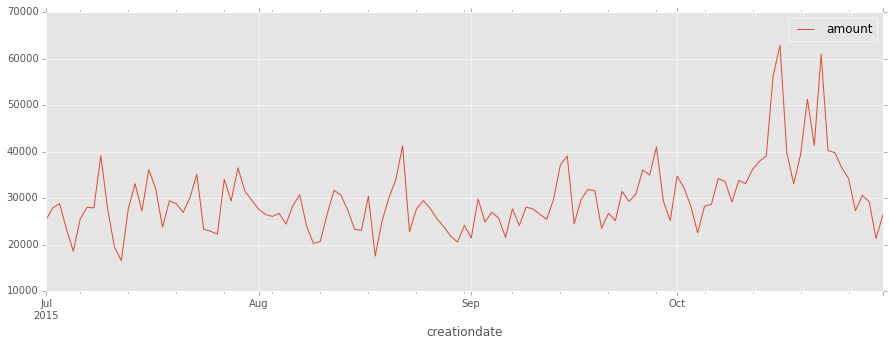

In [24]:
plt.figure();
fm.plot(figsize=(15,5), y = 'amount')

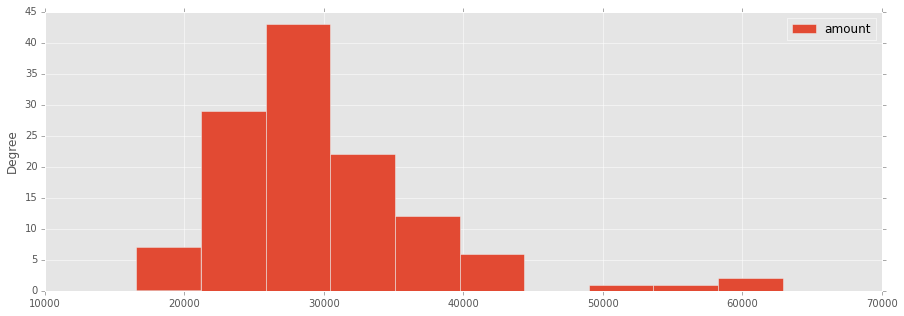

In [25]:
plt.figure();
fm.plot(figsize=(15,5), y = 'amount', kind = 'hist')

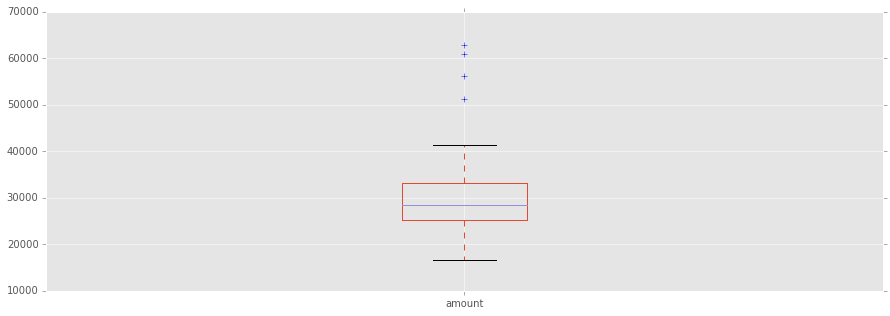

In [26]:
plt.figure();
fm.plot(figsize=(15,5), y = 'amount', kind = 'box')

In [27]:
fm_daily = fraud_d['amount'].groupby(fraud_d.index.day)

In [30]:
fm_daily.mean()

1     26725.531698
2     29103.622148
3     26959.027931
4     24936.373359
5     23901.196566
6     26009.857084
7     30133.316578
8     30873.567719
9     29221.997746
10    27041.640300
11    25533.874644
12    25678.159068
13    31247.139946
14    34062.225716
15    36539.929052
16    35666.726284
17    32530.628506
18    24925.076126
19    30834.629817
20    32567.518458
21    31324.318016
22    37004.768810
23    31729.563230
24    28216.207573
25    29469.108442
26    29123.403438
27    30466.083908
28    31447.863752
29    29111.864849
30    24420.894546
31    26498.909077
Name: amount, dtype: float64

In [31]:
fm_daily = fraud_d.groupby(pd.TimeGrouper('D'))

In [33]:
fm_daily.mean()

,txid,bin,amount,cvcresponsecode
creationdate,,,,
2015-07-01,214285.641243,483935.400141,25345.299082,0.813912
2015-07-02,212002.874007,484040.967124,27891.328520,0.805415
2015-07-03,202316.110149,483584.692689,28820.941832,0.746700
2015-07-04,217802.730586,484720.188286,23340.569631,0.826030
2015-07-05,222010.311573,484653.926757,18606.566436,0.852291
2015-07-06,219422.476792,485592.450558,25512.787226,0.777943
2015-07-07,218141.853365,484063.421875,28045.231170,0.766426
2015-07-08,216523.887949,485273.417336,27907.936152,0.757294
2015-07-09,216854.697170,486061.848442,39170.376415,0.722170


### Trying Pivot table

In [46]:
pivot_fraud = fraud_d.pivot_table(values=['amount'], index=['simple_journal', 'bookingdate', 'issuercountrycode'], aggfunc = np.mean)

In [48]:
pivot_fraud.values

array([[ 32900.],
       [ 24900.],
       [ 15240.],
       ..., 
       [ 11050.],
       [ 12425.],
       [ 12000.]])

### Grouping on status message for trends

In [10]:
fraud_d.groupby(fraud_d['simple_journal']).count()

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id
simple_journal,,,,,,,,,,,,,,,
Chargeback,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345
Refused,53346,53346,52857,53346,53206,53346,53346,53206,53346,51823,53346,53346,53346,53346,53346
Settled,236691,236691,236687,236691,236691,236691,236691,236349,236691,223497,236691,236691,236691,236691,236691


In [50]:
chargeback_grp = fraud_d.groupby(fraud_d['simple_journal'])

In [54]:
chargeback_grp.count()

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id
simple_journal,,,,,,,,,,,,,,,
Chargeback,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345
Refused,53346,53346,52857,53346,53206,53346,53346,53206,53346,51823,53346,53346,53346,53346,53346
Settled,236691,236691,236687,236691,236691,236691,236691,236349,236691,223497,236691,236691,236691,236691,236691


In [13]:
chargeback_grp.count()

simple_journal
Chargeback       345
Refused        53346
Settled       236691
Name: amount, dtype: int64

simple_journal
Chargeback    Axes(0.125,0.2;0.775x0.7)
Refused       Axes(0.125,0.2;0.775x0.7)
Settled       Axes(0.125,0.2;0.775x0.7)
dtype: object

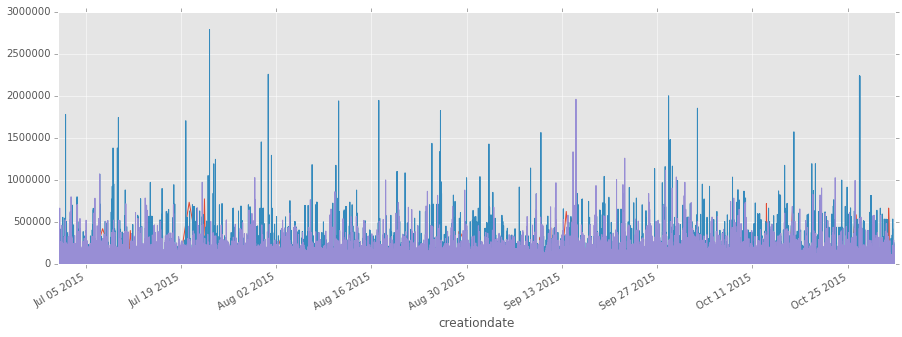

In [62]:
plt.figure();

chargeback_grp.plot(figsize=(15,5))

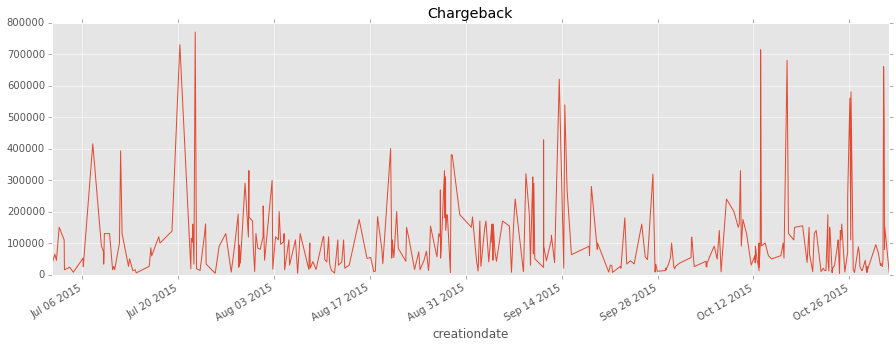

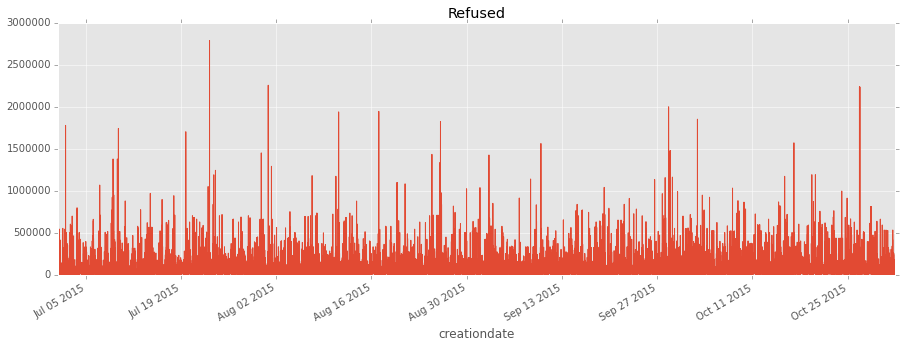

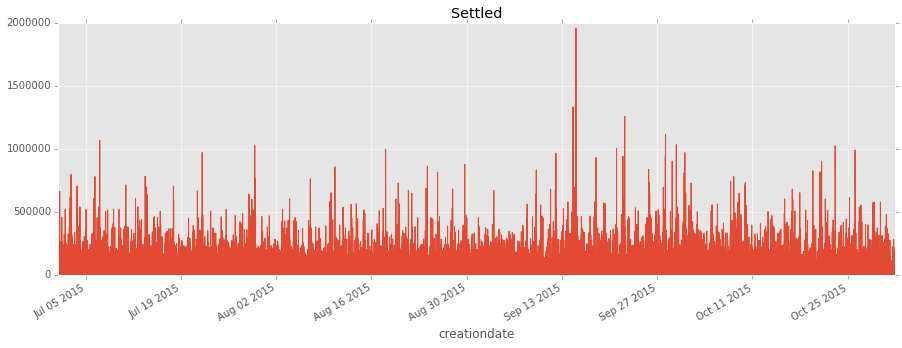

In [14]:
for name, group in chargeback_grp:
    plt.figure()
    group.plot(figsize=(15,5),title=(str(name)))

In [15]:
chargeback_grp.max()

simple_journal
Chargeback     769500
Refused       2785840
Settled       1955765
Name: amount, dtype: float64

In [23]:
chargeback_grp_mails = fraud_d[['amount', 'simple_journal']].groupby(fraud_d['mail_id'])


In [55]:
chargeback_grp.get_group('Chargeback')

,accountcode,amount,bin,bookingdate,card_id,cardverificationcodesupplied,currencycode,cvcresponsecode,ip_id,issuercountrycode,mail_id,shoppercountrycode,shopperinteraction,txid,txvariantcode
creationdate,,,,,,,,,,,,,,,
2015-07-01 23:03:11,MexicoAccount,64800,530056,2015-11-09 14:26:51,card184798,True,MXN,0,ip111778,MX,email68370,MX,Ecommerce,1,mccredit
2015-07-02 04:50:55,MexicoAccount,44900,547046,2015-11-09 14:27:38,card151595,True,MXN,0,ip78749,MX,email101299,MX,Ecommerce,2,mccredit
2015-07-02 14:30:28,MexicoAccount,149900,528843,2015-11-23 16:34:16,card242142,True,MXN,0,ip70594,MX,email278604,MX,Ecommerce,3,mccredit
2015-07-03 07:53:37,MexicoAccount,109900,547146,2015-11-23 16:34:51,card181744,True,MXN,0,ip113648,MX,email47409,MX,Ecommerce,4,mccredit
2015-07-08 18:35:35,MexicoAccount,89900,477291,2015-11-09 14:26:08,card97271,True,MXN,0,ip83553,MX,email205501,MX,Ecommerce,5,visaclassic
2015-07-08 23:04:26,MexicoAccount,79900,493161,2015-11-09 14:26:25,card159816,True,MXN,0,ip112410,MX,email243511,MX,Ecommerce,6,visaclassic
2015-07-09 02:31:36,MexicoAccount,69900,477291,2015-11-09 14:26:47,card251249,True,MXN,0,ip83481,MX,email137086,MX,Ecommerce,7,visaclassic
2015-07-09 04:56:48,MexicoAccount,129900,520416,2015-11-23 16:34:29,card70297,True,MXN,0,ip66704,MX,email295644,MX,Ecommerce,8,mccredit
2015-07-09 22:55:40,MexicoAccount,129900,477291,2015-12-08 19:58:35,card39791,True,MXN,0,ip68088,MX,email115605,MX,Ecommerce,9,visaclassic


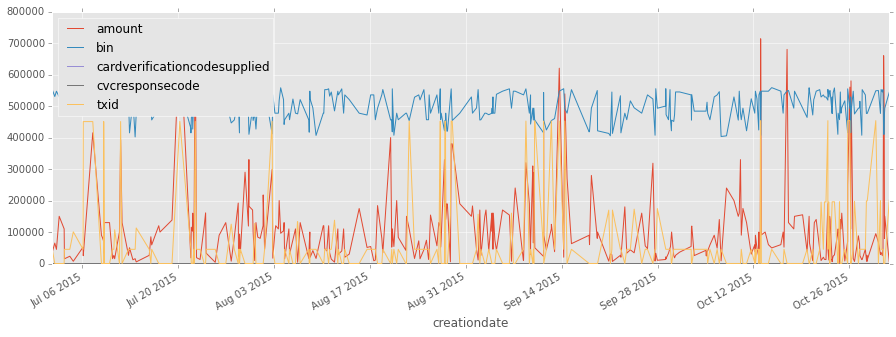

In [60]:
chargeback_grp.get_group('Chargeback').plot(figsize=(15,5))

In [61]:
chargeback_grp_mails = fraud_d[['amount', 'mail_id']].groupby(fraud_d['simple_journal'])

In [62]:
chargeback_grp_mails.describe()

amount
simple_journal                      
Chargeback     count      345.000000
               mean    105137.652174
               std     124188.477258
               min       3195.000000
               25%      26000.000000
               50%      65200.000000
               75%     129900.000000
               max     769500.000000
Refused        count    53346.000000
               mean     75353.882597
               std     122762.060476
               min        100.000000
               25%       7145.000000
               50%      24400.000000
               75%     102000.000000
               max    2785840.000000
Settled        count   236691.000000
               mean     18888.996037
               std      41342.000541
               min         50.000000
               25%       4000.000000
               50%       6595.000000
               75%      11850.000000
               max    1955765.000000

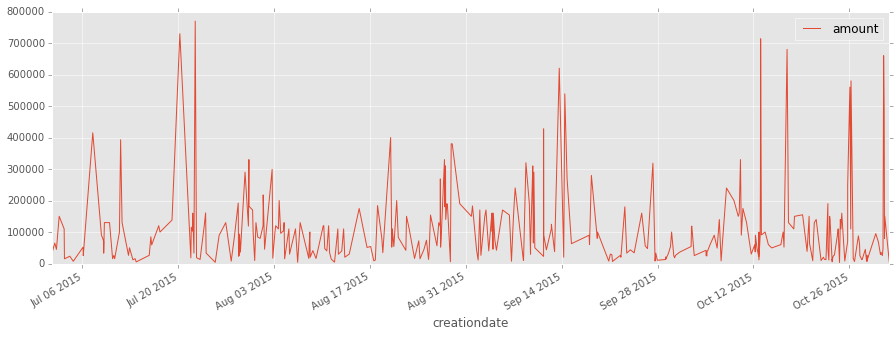

In [63]:
chargeback_grp_mails.get_group('Chargeback').plot(figsize=(15,5))

In [64]:
fraud_d['mail_id'].value_counts()

email170659    436
emailNA        366
email74363     140
email96620     109
email215327    107
email177079    100
email167180     94
email332470     93
email238321     90
email266928     83
email176764     81
email105415     78
email58891      71
email77164      68
email143269     65
email106902     64
email146135     63
email75029      58
email266992     58
email103415     57
email193709     51
email120957     51
email326487     50
email23092      49
email78050      49
email34050      48
email111465     48
email232713     47
email107876     46
email25332      45
              ... 
email72363       1
email27825       1
email27826       1
email27827       1
email27820       1
email154329      1
email138769      1
email301000      1
email32403       1
email946         1
email947         1
email945         1
email292371      1
email948         1
email89155       1
email32400       1
email32401       1
email32402       1
email32404       1
email301002      1
email32405       1
email32406  

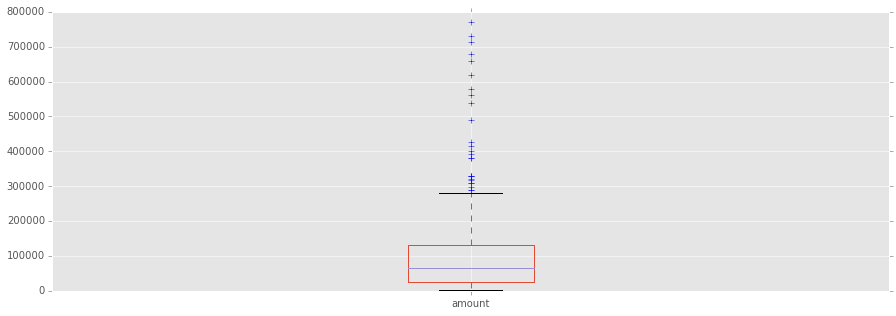

In [68]:
chargeback_grp.get_group('Chargeback').plot(kind='box', figsize=(15,5), y = ['amount'])

In [75]:
chargeback_grp.get_group('Chargeback')

,accountcode,amount,bin,bookingdate,card_id,cardverificationcodesupplied,currencycode,cvcresponsecode,ip_id,issuercountrycode,mail_id,shoppercountrycode,shopperinteraction,txid,txvariantcode
creationdate,,,,,,,,,,,,,,,
2015-07-01 23:03:11,MexicoAccount,64800,530056,2015-11-09 14:26:51,card184798,True,MXN,0,ip111778,MX,email68370,MX,Ecommerce,1,mccredit
2015-07-02 04:50:55,MexicoAccount,44900,547046,2015-11-09 14:27:38,card151595,True,MXN,0,ip78749,MX,email101299,MX,Ecommerce,2,mccredit
2015-07-02 14:30:28,MexicoAccount,149900,528843,2015-11-23 16:34:16,card242142,True,MXN,0,ip70594,MX,email278604,MX,Ecommerce,3,mccredit
2015-07-03 07:53:37,MexicoAccount,109900,547146,2015-11-23 16:34:51,card181744,True,MXN,0,ip113648,MX,email47409,MX,Ecommerce,4,mccredit
2015-07-08 18:35:35,MexicoAccount,89900,477291,2015-11-09 14:26:08,card97271,True,MXN,0,ip83553,MX,email205501,MX,Ecommerce,5,visaclassic
2015-07-08 23:04:26,MexicoAccount,79900,493161,2015-11-09 14:26:25,card159816,True,MXN,0,ip112410,MX,email243511,MX,Ecommerce,6,visaclassic
2015-07-09 02:31:36,MexicoAccount,69900,477291,2015-11-09 14:26:47,card251249,True,MXN,0,ip83481,MX,email137086,MX,Ecommerce,7,visaclassic
2015-07-09 04:56:48,MexicoAccount,129900,520416,2015-11-23 16:34:29,card70297,True,MXN,0,ip66704,MX,email295644,MX,Ecommerce,8,mccredit
2015-07-09 22:55:40,MexicoAccount,129900,477291,2015-12-08 19:58:35,card39791,True,MXN,0,ip68088,MX,email115605,MX,Ecommerce,9,visaclassic


### No. of chargebacks as per country

In [73]:
chargeback_grp.get_group('Chargeback')['accountcode'].value_counts()

MexicoAccount    155
APACAccount      124
UKAccount         36
SwedenAccount     30
dtype: int64

### No. of chargebacks as per card ID

In [76]:
chargeback_grp.get_group('Chargeback')['card_id'].value_counts()

card7918      5
card158982    5
card38698     4
card241682    3
card68415     3
card121495    3
card11959     3
card241265    2
card172769    2
card181005    2
card132046    2
card102534    2
card221724    2
card182921    2
card214602    2
card146515    2
card52726     2
card106242    2
card136291    2
card132993    2
card206418    2
card131108    2
card45886     2
card214990    2
card108925    1
card227836    1
card151236    1
card96104     1
card93471     1
card14537     1
             ..
card2659      1
card247446    1
card34327     1
card10824     1
card108294    1
card223178    1
card260257    1
card99594     1
card110464    1
card157361    1
card98117     1
card243246    1
card262777    1
card14697     1
card161666    1
card123854    1
card270126    1
card159223    1
card77403     1
card70297     1
card138883    1
card39791     1
card115256    1
card188827    1
card108918    1
card171137    1
card187531    1
card7845      1
card74661     1
card85518     1
dtype: int64

### No. of chargebacks as per Card type

In [89]:
chargeback_grp.get_group('Chargeback')['txvariantcode'].value_counts()

mccredit          152
visaclassic        66
visadebit          48
visaplatinum       31
visagold           19
mcdebit            13
visabusiness        5
visasignature       5
visa                4
visapurchasing      2
dtype: int64

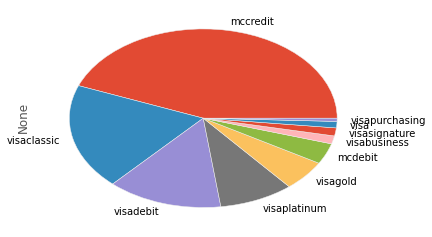

In [88]:
chargeback_grp.get_group('Chargeback')['txvariantcode'].value_counts().plot(kind = 'pie')

In [82]:
fraud_d['txvariantcode'].value_counts()

visadebit         172592
mccredit           63717
mcdebit            16679
visaclassic        16306
visaplatinum       10125
visagold            6545
visa                2019
visabusiness        1030
visasignature        619
visacorporate        421
mc                   167
visapurchasing       122
electron              27
vpay                   7
cirrus                 6
dtype: int64

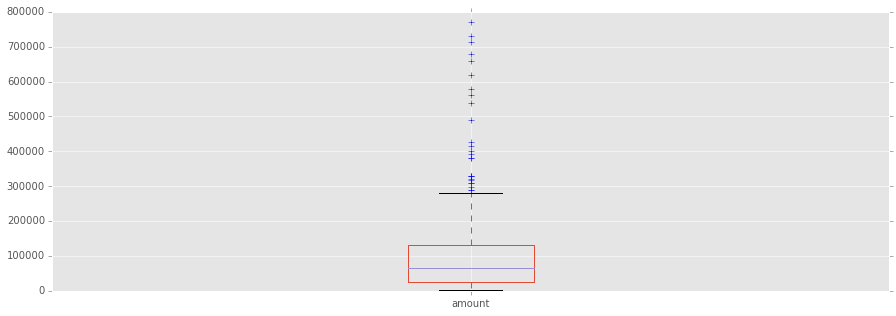

In [100]:
chargeback_grp.get_group('Chargeback')['amount'].plot(kind='box', figsize=(15,5))

In [106]:
chargeback_grp.get_group('Chargeback')['amount'].median()

65200.0

In [109]:
chargeback_grp.get_group('Settled')

,accountcode,amount,bin,bookingdate,card_id,cardverificationcodesupplied,currencycode,cvcresponsecode,ip_id,issuercountrycode,mail_id,shoppercountrycode,shopperinteraction,txid,txvariantcode
creationdate,,,,,,,,,,,,,,,
2015-07-01 00:01:38,MexicoAccount,38430,493172,2015-07-01 00:01:55,card1676,True,MXN,0,ip70047,MX,email212769,MX,Ecommerce,21104,visaclassic
2015-07-01 00:07:50,MexicoAccount,76900,493173,2015-07-01 00:08:04,card195764,True,MXN,0,ip76307,MX,email30610,MX,Ecommerce,21105,visagold
2015-07-01 00:20:54,MexicoAccount,59400,410180,2015-07-01 00:21:01,card130014,True,MXN,0,ip71421,MX,email260018,MX,Ecommerce,21108,visaclassic
2015-07-01 00:22:23,MexicoAccount,223600,547046,2015-07-01 00:22:46,card117795,True,MXN,0,ip110343,MX,email138367,MX,Ecommerce,21110,mccredit
2015-07-01 00:34:54,MexicoAccount,53800,547046,2015-07-01 00:35:04,card117795,True,MXN,0,ip110343,MX,email138367,MX,Ecommerce,21112,mccredit
2015-07-01 00:37:25,MexicoAccount,49900,549639,2015-07-01 00:37:32,card87242,True,MXN,0,ip83748,MX,email234753,MX,Ecommerce,21113,mccredit
2015-07-01 00:41:24,MexicoAccount,62900,465828,2015-07-01 00:41:35,card121736,True,MXN,0,ip84224,MX,email227839,MX,Ecommerce,21114,visadebit
2015-07-01 00:48:08,MexicoAccount,160900,548234,2015-07-01 00:48:22,card95612,True,MXN,0,ip110418,MX,email318973,MX,Ecommerce,21116,mccredit
2015-07-01 01:06:28,MexicoAccount,97900,425981,2015-07-01 01:06:40,card214337,True,MXN,0,ip110896,MX,email9316,MX,Ecommerce,21120,visagold


### Aggregate by Email IDs 

In [126]:
chargeback_grp_mails = fraud_d.groupby([fraud_d['mail_id'], fraud_d['simple_journal']])

In [133]:
chargeback_grp_mails.size().unstack()

simple_journal,Chargeback,Refused,Settled
mail_id,,,
email1,NaN,6,1
email10,NaN,NaN,1
email100,NaN,2,NaN
email100002,NaN,NaN,1
email100004,NaN,NaN,2
email100007,NaN,1,1
email10001,NaN,NaN,1
email100012,NaN,NaN,1
email100013,NaN,NaN,1


In [134]:
chargeback_piv_mails = fraud_d.pivot_table(index = ['mail_id', 'simple_journal'])

In [135]:
chargeback_piv_mails

amount            bin  cvcresponsecode  \
mail_id     simple_journal                                                  
email1      Refused          42500.000000  518181.833333              0.5   
            Settled          42500.000000  475128.000000              1.0   
email10     Settled           6245.000000  465942.000000              1.0   
email100    Refused           9972.500000  475128.000000              0.0   
email100002 Settled           9000.000000  465943.000000              1.0   
email100004 Settled           5267.500000  475139.000000              1.0   
email100007 Refused          11100.000000  465859.000000              1.0   
            Settled          11000.000000  465859.000000              1.0   
email10001  Settled         215000.000000  428455.000000              1.0   
email100012 Settled         229800.000000  413406.000000              0.0   
email100013 Settled           3400.000000  454742.000000              1.0   
email100017 Settled          37850.000000  456457.000000              0.0   
email100018 Settled           5570.000000  475129.000000              1.0   
email100019 Settled           5070.000000  465942.000000              1.0   
email10002  Settled           1745.000000  492181.000000              1.0   
email100022 Settled           5755.000000  454312.000000              1.0   
email100023 Settled           1800.000000  454742.000000              1.0   
email100024 Settled           1195.000000  453979.000000              1.0   
email100025 Settled           4895.000000  475117.000000              1.0   
email100026 Settled           3100.000000  475139.000000              1.0   
email100028 Settled           6940.000000  529930.000000              1.0   
email100029 Refused           6020.000000  465901.000000              1.0   
email10003  Settled          69900.000000  554501.000000              1.0   
email100030 Settled           2895.000000  476224.000000              1.0   
email100031 Refused          15500.000000  552188.000000              1.0   
            Settled           6395.000000  552188.000000              1.0   
email100032 Settled           2750.000000  557349.000000              1.0   
email100033 Settled           5950.000000  475142.000000              1.0   
email100034 Settled         102000.000000  554501.000000              1.0   
email100035 Settled          19350.000000  554501.000000              1.0   
...                                   ...            ...              ...   
email99959  Settled          11050.000000  401795.000000              0.0   
email99960  Refused          39950.000000  429522.000000              0.0   
email99962  Settled            995.000000  446238.000000              1.0   
email99965  Refused         182046.666667  477291.000000              0.0   
email99970  Settled           5750.000000  401795.000000              0.0   
email99971  Settled           4395.000000  475714.000000              1.0   
email99972  Settled           6875.000000  546097.000000              1.0   
email99973  Settled           2600.000000  475129.000000              1.0   
email99974  Settled          15375.000000  475128.000000              1.0   
email99976  Settled           3995.000000  453979.000000              1.0   
email99977  Settled           7820.000000  476367.000000              1.0   
email99978  Settled           1895.000000  546097.000000              1.0   
email99980  Settled          34900.000000  458109.000000              1.0   
email99982  Settled           5600.000000  492182.000000              1.0   
email99983  Settled           6700.000000  475714.000000              1.0   
email99984  Settled           7250.000000  476365.000000              1.0   
email99985  Settled          79900.000000  453903.000000              1.0   
email99986  Refused         410100.000000  493172.000000              0.0   
email99987  Refused          18190.000000  492181.000000              1.0   
email9999   Settled           6

In [145]:
chargeback_grp_mails = fraud_d[fraud_d['simple_journal'] == 'Chargeback'].groupby('mail_id')

In [151]:
chargeback_grp_mails.get_group('email102930')['bookingdate']

creationdate
2015-09-09 10:32:28    2015-11-09 15:24:07
2015-09-09 10:44:37    2015-11-09 15:24:05
Name: bookingdate, dtype: object

In [153]:
chargeback_grp_mails.get_group('email102930').index[0]

Timestamp('2015-09-09 10:32:28')

## Important Things to Note for final visualizations

- There is always a time difference between 'creationdate' and 'bookingdate' in case of 'Chargebacks'

- There is no time difference when it is 'Settled' or 'Refused'

- In 'Chargebacks', sometimes the 'issuercontrycode' is different from 'shoppercountrycode'

- Aggregated data on mail_id, country_codes, card_type, shoppercode and 